In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
columns = ['Checking account', 'Duration', 'credithistory', 'Purpose', 'Credit amount', 
         'Saving accounts', 'employmentsince', 'installmentrate', 'Sex', 'otherdebtors', 
         'residencesince', 'property', 'Age', 'otherinstallmentplans', 'Housing', 
         'existingcredits', 'Job', 'peopleliable', 'telephone', 'foreignworker', 'good/bad']
train = pd.read_csv('german.csv',delimiter=' ',names=columns)
#train
train.columns

Index(['Checking account', 'Duration', 'credithistory', 'Purpose',
       'Credit amount', 'Saving accounts', 'employmentsince',
       'installmentrate', 'Sex', 'otherdebtors', 'residencesince', 'property',
       'Age', 'otherinstallmentplans', 'Housing', 'existingcredits', 'Job',
       'peopleliable', 'telephone', 'foreignworker', 'good/bad'],
      dtype='object')

In [47]:
print('Training data have {} columns and {} rows'.format(train.shape[1],train.shape[0]))

Training data have 21 columns and 1000 rows


In [48]:
train.isnull().any() #checking which is null

Checking account         False
Duration                 False
credithistory            False
Purpose                  False
Credit amount            False
Saving accounts          False
employmentsince          False
installmentrate          False
Sex                      False
otherdebtors             False
residencesince           False
property                 False
Age                      False
otherinstallmentplans    False
Housing                  False
existingcredits          False
Job                      False
peopleliable             False
telephone                False
foreignworker            False
good/bad                 False
dtype: bool

In [49]:
#function for replacing null value with their mode
def fillNaN(df,columns):
    for column in columns:
        df[column].fillna(df[column].mode()[0], inplace=True)
fillNaN(train,['Checking account','Saving accounts'])

# Let's Visualise dataset for Analysis

In [50]:
def bar_chart(feature):
    good = train[train['good/bad']==1][feature].value_counts()
    bad = train[train['good/bad']==2][feature].value_counts()
    df = pd.DataFrame([good,bad])
    df.index = ['Good','Bad']
    df.plot(kind='bar',stacked=True,figsize=(10,5))
    plt.xlabel(feature)

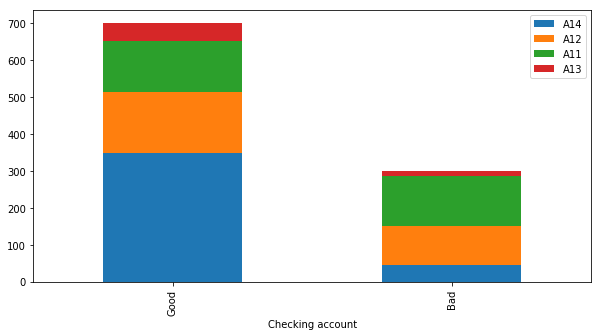

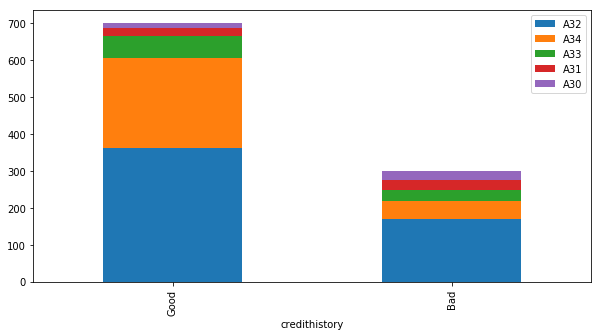

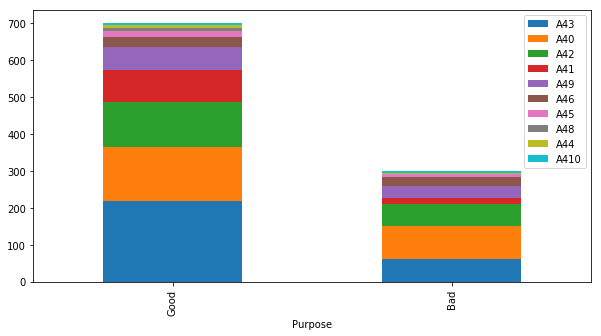

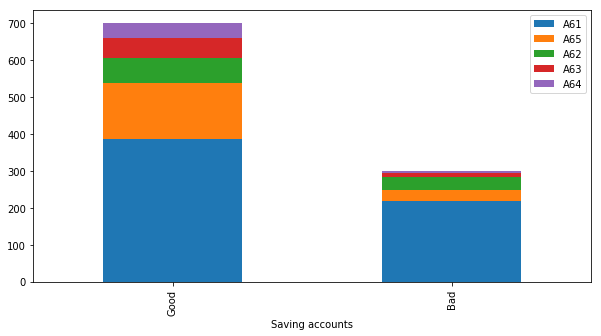

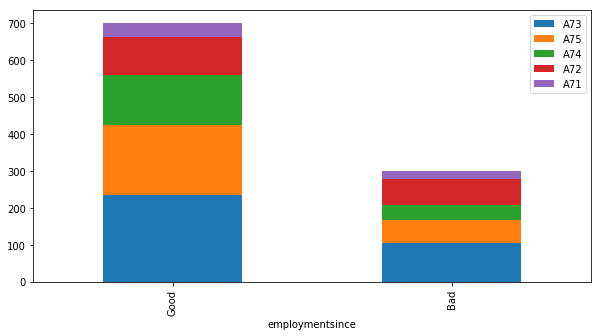

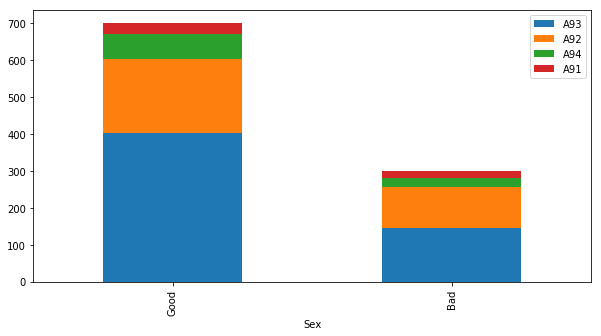

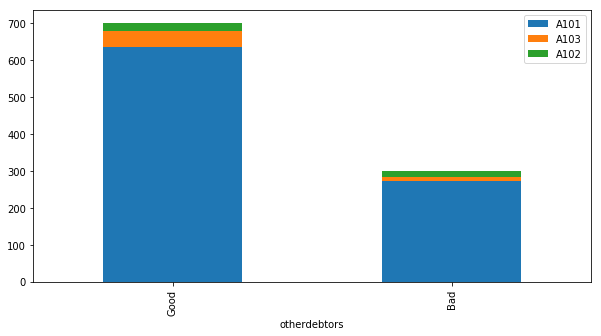

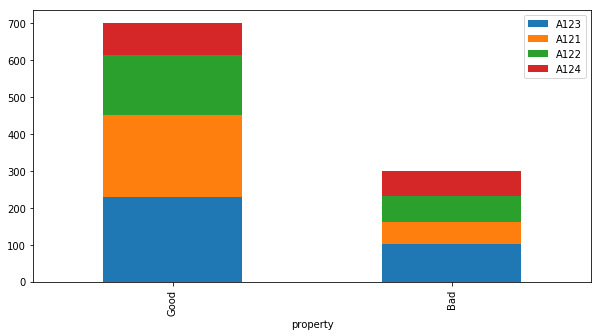

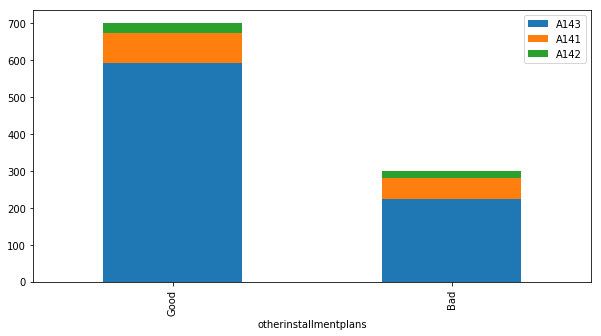

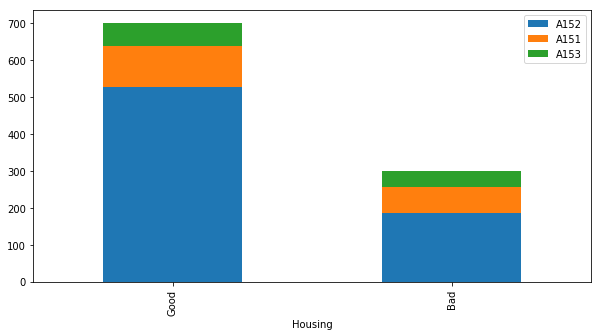

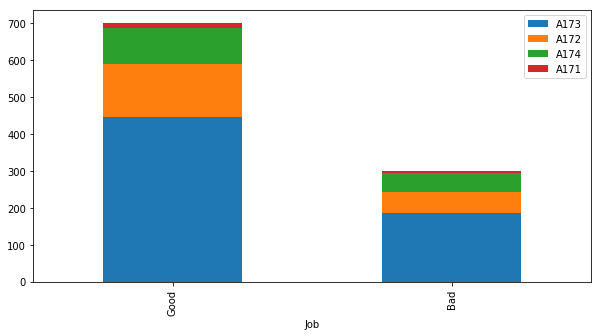

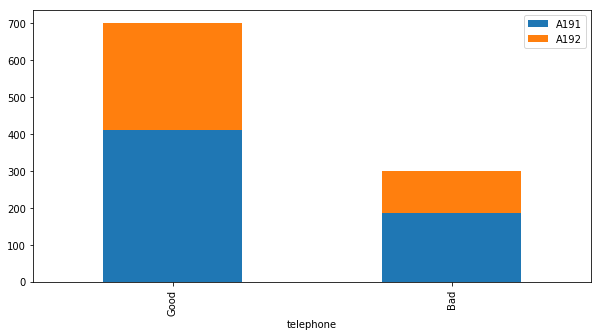

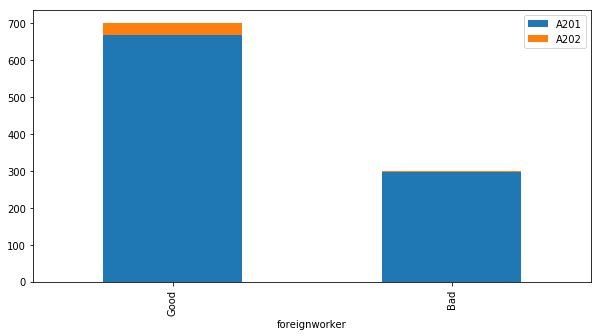

In [51]:
for column in train.select_dtypes(exclude=['int64']):
    bar_chart(str(column))

as we can in the bar chart that all worker who doesn't belong to foreign are good

In [52]:
#converting categorical to numerical
from sklearn.preprocessing import LabelEncoder

#train = pd.get_dummies(train)
def categorical_to_numerical(df):
    lb=LabelEncoder()
    for column in ['Checking account', 'Purpose','Saving accounts', 'Sex', 'Age', 'Housing', 'Job','credithistory','employmentsince','installmentrate','otherdebtors','residencesince', 'property','otherinstallmentplans','peopleliable', 'telephone', 'foreignworker','existingcredits']:
        if(df[column].dtype=='object'):
            df[column] = lb.fit_transform(df[column])
categorical_to_numerical(train)
train.drop(['Purpose','Housing','Job','property','foreignworker','telephone'],axis=1,inplace=True)
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(train)) #calculating z-score
train = train[(z < 3).all(axis=1)] #Removing outliers if any

# Modeling

In [53]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [54]:
target = train['good/bad']
train.drop(['good/bad'],axis=1,inplace=True)
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 900 entries, 0 to 999
Data columns (total 14 columns):
Checking account         900 non-null int64
Duration                 900 non-null int64
credithistory            900 non-null int64
Credit amount            900 non-null int64
Saving accounts          900 non-null int64
employmentsince          900 non-null int64
installmentrate          900 non-null int64
Sex                      900 non-null int64
otherdebtors             900 non-null int64
residencesince           900 non-null int64
Age                      900 non-null int64
otherinstallmentplans    900 non-null int64
existingcredits          900 non-null int64
peopleliable             900 non-null int64
dtypes: int64(14)
memory usage: 105.5 KB


# Cross Validation (K-fold)

In [55]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10,shuffle=True,random_state=0)

# KNN


In [56]:
clf = KNeighborsClassifier(n_neighbors=13)
scoring='accuracy'
score = cross_val_score(clf,train,target,cv=k_fold,n_jobs=1,scoring=scoring)
print(score)
print(round(np.mean(score)*100))

[0.67777778 0.77777778 0.62222222 0.65555556 0.68888889 0.65555556
 0.56666667 0.72222222 0.75555556 0.62222222]
67.0


# Decision Tree

In [57]:
clf = DecisionTreeClassifier()
scoring='accuracy'
score = cross_val_score(clf,train,target,cv=k_fold,n_jobs=1,scoring=scoring)
print(score)
print(round(np.mean(score)*100))

[0.68888889 0.63333333 0.7        0.58888889 0.7        0.76666667
 0.68888889 0.77777778 0.66666667 0.62222222]
68.0


# Random Forest

In [58]:
clf = RandomForestClassifier(n_estimators=13)
scoring='accuracy'
score = cross_val_score(clf,train,target,cv=k_fold,n_jobs=1,scoring=scoring)
print(score)
print(round(np.mean(score)*100))

[0.74444444 0.75555556 0.7        0.64444444 0.71111111 0.73333333
 0.74444444 0.76666667 0.71111111 0.64444444]
72.0


# Naive Bayes

In [59]:
clf = GaussianNB()
scoring='accuracy'
score = cross_val_score(clf,train,target,cv=k_fold,n_jobs=1,scoring=scoring)
print(score)
print(round(np.mean(score)*100))

[0.72222222 0.73333333 0.75555556 0.75555556 0.74444444 0.72222222
 0.75555556 0.81111111 0.82222222 0.63333333]
75.0


# SVC

In [60]:
clf = SVC()
scoring='accuracy'
score = cross_val_score(clf,train,target,cv=k_fold,n_jobs=1,scoring=scoring)
print(score)
print(round(np.mean(score)*100))

[0.67777778 0.81111111 0.6        0.67777778 0.74444444 0.67777778
 0.67777778 0.77777778 0.81111111 0.6       ]
71.0


In [61]:
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
X_train,X_test,y_train,y_test = train_test_split(train,target,test_size=0.33,random_state=96)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
models = [
    RandomForestClassifier(n_estimators=200),
    SVC(),
    GaussianNB(),
    KNeighborsClassifier(n_neighbors=13),
]
models_accuracy = {
    "model":[],
    "accuracy":[]
}
for model in models:
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    models_accuracy['model'].append(model.__class__.__name__)
    models_accuracy['accuracy'].append(accuracy_score(y_pred,y_test))
accuracy = pd.DataFrame(models_accuracy)
accuracy

,model,accuracy
0,RandomForestClassifier,0.784512
1,SVC,0.734007
2,GaussianNB,0.727273
3,KNeighborsClassifier,0.723906


In [62]:
accuracy.sort_values('accuracy',ascending=False)

,model,accuracy
0,RandomForestClassifier,0.784512
1,SVC,0.734007
2,GaussianNB,0.727273
3,KNeighborsClassifier,0.723906


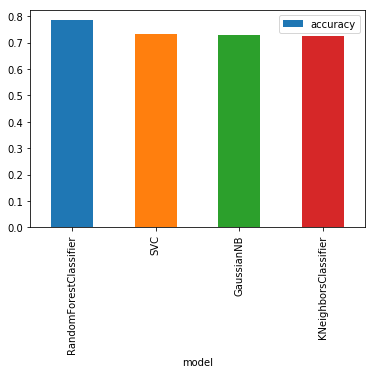

In [63]:
accuracy.sort_values('accuracy',ascending=False).plot.bar(x='model',y='accuracy')